In [1]:
import warnings

warnings.filterwarnings("ignore")

from sklearn.datasets import load_digits

digits = load_digits()  # 加载数据集

digits.data.shape, digits.target.shape

((1797, 64), (1797,))

In [2]:
# 数据切分

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=1, test_size=0.2
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [3]:
# 模型训练
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# verbose=1 可以输出每一步迭代的损失值
model = MLPClassifier(random_state=1, verbose=1, max_iter=50)

model.fit(X_train, y_train)  # 训练模型
y_pred = model.predict(X_test)  # 测试模型
accuracy_score(y_test, y_pred)  # 准确度

Iteration 1, loss = 7.02205935
Iteration 2, loss = 3.65516147
Iteration 3, loss = 2.47679869
Iteration 4, loss = 1.49613624
Iteration 5, loss = 1.00259484
Iteration 6, loss = 0.72002813
Iteration 7, loss = 0.54341224
Iteration 8, loss = 0.43746627
Iteration 9, loss = 0.36224450
Iteration 10, loss = 0.30940686
Iteration 11, loss = 0.26808400
Iteration 12, loss = 0.23881533
Iteration 13, loss = 0.21317742
Iteration 14, loss = 0.19387023
Iteration 15, loss = 0.17858371
Iteration 16, loss = 0.16540074
Iteration 17, loss = 0.15237040
Iteration 18, loss = 0.14083022
Iteration 19, loss = 0.13015872
Iteration 20, loss = 0.12388636
Iteration 21, loss = 0.11475134
Iteration 22, loss = 0.10716270
Iteration 23, loss = 0.10093849
Iteration 24, loss = 0.09392212
Iteration 25, loss = 0.08891589
Iteration 26, loss = 0.08473752
Iteration 27, loss = 0.08024667
Iteration 28, loss = 0.07630452
Iteration 29, loss = 0.07093241
Iteration 30, loss = 0.06705022
Iteration 31, loss = 0.06426208
Iteration 32, los

0.975

In [4]:
# 找到那些被模型错误预测的样本
n = 0
for i, (pred, test) in enumerate(zip(y_pred, y_test)):
    if pred != test:
        print("样本索引:", i, "被错误预测为: ", pred, "正确标签为: ", test)
        n += 1
print("总计错误预测样本数量:", n)

样本索引: 21 被错误预测为:  4 正确标签为:  1
样本索引: 58 被错误预测为:  9 正确标签为:  5
样本索引: 88 被错误预测为:  9 正确标签为:  5
样本索引: 173 被错误预测为:  5 正确标签为:  8
样本索引: 208 被错误预测为:  4 正确标签为:  0
样本索引: 281 被错误预测为:  4 正确标签为:  0
样本索引: 321 被错误预测为:  4 正确标签为:  7
样本索引: 347 被错误预测为:  5 正确标签为:  8
样本索引: 348 被错误预测为:  3 正确标签为:  5
总计错误预测样本数量: 9


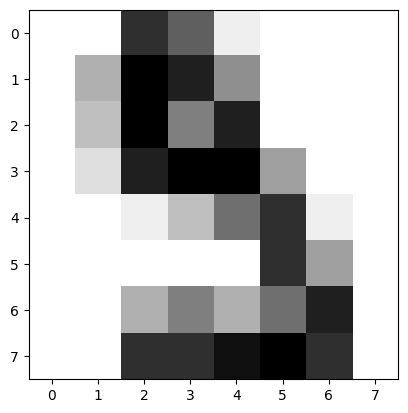

In [5]:
# 绘制错误预测的样本
from matplotlib import pyplot as plt

%matplotlib inline

plt.imshow(X_test[108].reshape((8, 8)), cmap=plt.cm.gray_r)

In [6]:
# 动态增量训练

# scikit-learn 增量训练的方法是 model.partial_fit(X, y)

In [7]:
import numpy as np

addition_index = []
for i, (pred, test) in enumerate(zip(y_pred, y_test)):
    if pred != test:
        addition_index.append(i)

addition_X = X_test[addition_index]  # 错误预测样本特征
addition_y = y_test[addition_index]  # 错误预测样本正确标签

# 增量训练模型
model.partial_fit(addition_X, addition_y)
model

# 错误预测样本的总数减少了。不过，部分样本依旧无法正确预测，且由于增量学习样本的输入，导致模型参数的整体变动，所以也可能发生之前正确预测的样本被错误预测的现象。
# 当然，如果错误预测样本总数并未减少，就可以多次重复执行上方两个单元格让模型不断学习错误样本，应该能看到更为直观的效果。

Iteration 1, loss = 2.24865593


MLPClassifier(max_iter=50, random_state=1, verbose=1)

In [11]:
# 在浏览器上进行一次数字手绘，作为数据
from IPython.display import HTML

input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 43px; height: 44px;">
<canvas width="40" height="40"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">重绘</button>
</td>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 8*8; i++) pixels[i] = 0;
    var click = 0;

    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 5, 5);
            x = Math.floor(e.offsetY * 0.2);
            y = Math.floor(e.offsetX * 0.2) + 1;
            for (var dy = 0; dy < 1; dy++){
                for (var dx = 0; dx < 1; dx++){
                    if ((x + dx < 8) && (y + dy < 8)){
                        pixels[(y+dy)+(x+dx)*8] = 1;
                    }
                }
            }
        } else {
            if (click == 1) set_value();
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 8*8; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
        kernel.execute("f = open('digits.json', 'w')");
        kernel.execute("f.write('{\\"inputs\\":%s}' % image)");
        kernel.execute("f.close()");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 40, 40);
        for (var i = 0; i < 8*8; i++) pixels[i] = 0;
    }
</script>
"""
randint = np.random.randint(0, 9)
print(f"请在下方图框中细心绘制手写字符 {randint}")
HTML(input_form + javascript)

请在下方图框中细心绘制手写字符 1


In [9]:
# 绘制手绘出来的数字
import json

import numpy as np

with open("digits.json") as f:
    inputs = f.readlines()[0]
    inputs_array = np.array(json.loads(inputs)["inputs"])
plt.imshow(inputs_array.reshape((8, 8)), cmap=plt.cm.gray_r)


# 数据预处理
# 你会发现，由于 DIGITS 数据集的图像分辨率为 8 x 8 像素，处理之后的图像会与绘制图像稍有区别。于此同时，因为我们上方绘制的图像为 2 值图像，即黑色像素数值存为 1，白色像素存为 0。
# 我们需要重新训练 DIGITS 模型，使之匹配。我们将 digits.data 中大于 0 的值全部替换为 1，并使用全部数据用于训练。

digits.data[digits.data > 0] = 1
# 重新训练神经网络
model = MLPClassifier(tol=0.001, max_iter=50, verbose=1)
model.fit(digits.data, digits.target)


inputs_array = np.atleast_2d(inputs_array)  # 将其处理成 2 维数组
result = model.predict(inputs_array)  # 预测


# 训练好的模型来预测自行绘制的手写字符,对每次预测结果进行增量训练来改善模型。如果预测正确，增量训练可以将此样本纳入模型中。如果预测错误，增量训练依据可以起到持续改善模型的效果。
if result != randint:
    print(f"预测错误｜预测标签: {result}｜真实标签: {randint}")
    model.partial_fit(inputs_array, np.atleast_1d(randint))
    print("完成增量训练")
else:
    print(f"预测正确｜预测标签: {result}｜真实标签: {randint}")
    model.partial_fit(inputs_array, np.atleast_1d(randint))
    print("完成增量训练")

# 神经网络可以输出不同标签预测的概率,网络对输入图像属于类别的评判依据

# 输出神经网络对各类别的概率值
pred_proba = model.predict_proba(np.atleast_2d(inputs_array))

# 绘制柱形图
plt.xticks(range(10))
plt.bar(range(10), pred_proba[0], align="center")
# 柱形图值越大，即代表网络认为输入图像属于该类别的概率更高。

# 尝试多次重复执行上方两个单元格，即反复增量训练自定义手写字符，应该可以看到增量训练使得正确标签的概率越来越高，这就是通过增量训练来优化模型的直观效果。

# 应用：可以借助于前面模型部署的思路来实现一个线上实时手写字符识别应用。并收集每次识别的结果对模型进行增量训练

FileNotFoundError: [Errno 2] No such file or directory: 'digits.json'